# CAPSTONE PROJECT
## Phase 2: Data Understanding & Preparation
### Data Ingestion & Wrangling
SALIFOU SYLLA

OCTOBER 7, 2020

# Crash Reporting from dataMontgomery

The dataset used is Crash Reporting Data set. Those datasets are about car crashes that have occurred in the Montgomery County, they provide information about the driver, the incident, and the non-motorist. They are from https://www.montgomerycountymd.gov/. The dataMontgomery program seeks to provide residents and constituents with direct access to County datasets in consumable formats, so they may be viewed, sorted and used in various ways, including being potentially leveraged in the development of new applications and services by interested parties. Providing this information offers the public an opportunity to review and analyze raw data, and the opportunity to use it for a variety of purposes. The following are those three datasets:
1.	Crash Reporting - Incidents Data:
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf
2.	Crash Reporting - Drivers Data 
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632
3.	Crash Reporting - Non-Motorists Data 
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fkdce5


## Importing Libraries

In [233]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
#from pyproj import Proj, transform
from datetime import datetime
from datetime import date, time
import matplotlib.pyplot as plt
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


## Loading web data file to pandas dataframe
Since dataMontgomery updates its datasets frequently, then we are
reading data from the dataMontgomery url each time in the code. 

### Loading the first dataset (Incidents Data)

In [234]:
url = "https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD"
incidentsData = pd.read_csv(url)
incidentsData.info()

C:\Users\Salifou Sylla\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66024 entries, 0 to 66023
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Report Number                 66024 non-null  object 
 1   Local Case Number             66024 non-null  object 
 2   Agency Name                   66024 non-null  object 
 3   ACRS Report Type              66024 non-null  object 
 4   Crash Date/Time               66024 non-null  object 
 5   Hit/Run                       66022 non-null  object 
 6   Route Type                    57246 non-null  object 
 7   Mile Point                    57611 non-null  float64
 8   Mile Point Direction          57260 non-null  object 
 9   Lane Direction                57622 non-null  object 
 10  Lane Number                   66024 non-null  int64  
 11  Lane Type                     6379 non-null   object 
 12  Number of Lanes               66024 non-null  int64  
 13  D

In [235]:
# remove spaces in columns name
incidentsData.columns = incidentsData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
incidentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66024 entries, 0 to 66023
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   report_number                 66024 non-null  object 
 1   local_case_number             66024 non-null  object 
 2   agency_name                   66024 non-null  object 
 3   acrs_report_type              66024 non-null  object 
 4   crash_date_time               66024 non-null  object 
 5   hit_run                       66022 non-null  object 
 6   route_type                    57246 non-null  object 
 7   mile_point                    57611 non-null  float64
 8   mile_point_direction          57260 non-null  object 
 9   lane_direction                57622 non-null  object 
 10  lane_number                   66024 non-null  int64  
 11  lane_type                     6379 non-null   object 
 12  number_of_lanes               66024 non-null  int64  
 13  d

### Loading the second dataset (Drivers Data)

In [236]:
url = "https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD"
driversData = pd.read_csv(url)
driversData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117248 entries, 0 to 117247
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   117248 non-null  object 
 1   Local Case Number               117248 non-null  object 
 2   Agency Name                     117248 non-null  object 
 3   ACRS Report Type                117248 non-null  object 
 4   Crash Date/Time                 117248 non-null  object 
 5   Route Type                      105891 non-null  object 
 6   Road Name                       106468 non-null  object 
 7   Cross-Street Type               105877 non-null  object 
 8   Cross-Street Name               106464 non-null  object 
 9   Off-Road Description            10779 non-null   object 
 10  Municipality                    12784 non-null   object 
 11  Related Non-Motorist            3674 non-null    object 
 12  Collision Type  

In [237]:
# remove spaces in columns name
driversData.columns = driversData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
driversData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117248 entries, 0 to 117247
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   report_number                   117248 non-null  object 
 1   local_case_number               117248 non-null  object 
 2   agency_name                     117248 non-null  object 
 3   acrs_report_type                117248 non-null  object 
 4   crash_date_time                 117248 non-null  object 
 5   route_type                      105891 non-null  object 
 6   road_name                       106468 non-null  object 
 7   cross_street_type               105877 non-null  object 
 8   cross_street_name               106464 non-null  object 
 9   off_road_description            10779 non-null   object 
 10  municipality                    12784 non-null   object 
 11  related_non_motorist            3674 non-null    object 
 12  collision_type  

### Loading the third dataset (Non-Motorists Data)

In [238]:
url = "https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD"
nonMotoristsData = pd.read_csv(url)
nonMotoristsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Report Number                     3815 non-null   object 
 1   Local Case Number                 3815 non-null   int64  
 2   Agency Name                       3815 non-null   object 
 3   ACRS Report Type                  3815 non-null   object 
 4   Crash Date/Time                   3815 non-null   object 
 5   Route Type                        2913 non-null   object 
 6   Road Name                         2959 non-null   object 
 7   Cross-Street Type                 2913 non-null   object 
 8   Cross-Street Name                 2958 non-null   object 
 9   Off-Road Description              856 non-null    object 
 10  Municipality                      417 non-null    object 
 11  Related Non-Motorist              3815 non-null   object 
 12  Collis

In [239]:
# remove spaces in columns name
nonMotoristsData.columns = nonMotoristsData.columns.str.replace(' ','_').str.lower().str.replace('/','_').str.replace('-','_')
nonMotoristsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   report_number                     3815 non-null   object 
 1   local_case_number                 3815 non-null   int64  
 2   agency_name                       3815 non-null   object 
 3   acrs_report_type                  3815 non-null   object 
 4   crash_date_time                   3815 non-null   object 
 5   route_type                        2913 non-null   object 
 6   road_name                         2959 non-null   object 
 7   cross_street_type                 2913 non-null   object 
 8   cross_street_name                 2958 non-null   object 
 9   off_road_description              856 non-null    object 
 10  municipality                      417 non-null    object 
 11  related_non_motorist              3815 non-null   object 
 12  collis

# Combining DataFrames with Pandas
## Combine three DataFrames using a unique ID found in those DataFrames



### Identifying join keys
To identify appropriate join keys we first need to know which field(s) are shared between the three files (DataFrames). We might inspect all three DataFrames to identify these columns. If we are lucky, the three DataFrames will have columns with the same name that also contain the same data. If we are less lucky, we need to identify a (differently-named) column in each DataFrame that contains the same information.

In [240]:
incidentsData.columns

Index(['report_number', 'local_case_number', 'agency_name', 'acrs_report_type',
       'crash_date_time', 'hit_run', 'route_type', 'mile_point',
       'mile_point_direction', 'lane_direction', 'lane_number', 'lane_type',
       'number_of_lanes', 'direction', 'distance', 'distance_unit',
       'road_grade', 'nontraffic', 'road_name', 'cross_street_type',
       'cross_street_name', 'off_road_description', 'municipality',
       'related_non_motorist', 'at_fault', 'collision_type', 'weather',
       'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non_motorist_substance_abuse',
       'first_harmful_event', 'second_harmful_event', 'fixed_oject_struck',
       'junction', 'intersection_type', 'intersection_area', 'road_alignment',
       'road_condition', 'road_division', 'latitude', 'longitude', 'location'],
      dtype='object')

In [241]:
driversData.columns


Index(['report_number', 'local_case_number', 'agency_name', 'acrs_report_type',
       'crash_date_time', 'route_type', 'road_name', 'cross_street_type',
       'cross_street_name', 'off_road_description', 'municipality',
       'related_non_motorist', 'collision_type', 'weather',
       'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non_motorist_substance_abuse', 'person_id',
       'driver_at_fault', 'injury_severity', 'circumstance',
       'driver_distracted_by', 'drivers_license_state', 'vehicle_id',
       'vehicle_damage_extent', 'vehicle_first_impact_location',
       'vehicle_second_impact_location', 'vehicle_body_type',
       'vehicle_movement', 'vehicle_continuing_dir', 'vehicle_going_dir',
       'speed_limit', 'driverless_vehicle', 'parked_vehicle', 'vehicle_year',
       'vehicle_make', 'vehicle_model', 'equipment_problems', 'latitude',
       'longitude', 'location'],
      dtype='object')

In [242]:
nonMotoristsData.columns

Index(['report_number', 'local_case_number', 'agency_name', 'acrs_report_type',
       'crash_date_time', 'route_type', 'road_name', 'cross_street_type',
       'cross_street_name', 'off_road_description', 'municipality',
       'related_non_motorist', 'collision_type', 'weather',
       'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non_motorist_substance_abuse', 'person_id',
       'pedestrian_type', 'pedestrian_movement', 'pedestrian_actions',
       'pedestrian_location', 'pedestrian_obeyed_traffic_signal',
       'pedestrian_visibility', 'at_fault', 'injury_severity',
       'safety_equipment', 'latitude', 'longitude', 'location'],
      dtype='object')

The report number or ACRS Report Number (acrs_report_type) assigned to the incident is a common key identifier.

## Concatenating Dataframes
Now that we know the fields with the common incidents ID attributes in each DataFrame, we are almost ready to join our data. However, since there are different types of joins, we also need to decide which type of join makes sense for our analysis.

In [243]:
concat1 = pd.concat([incidentsData, driversData])



In [244]:
#The head function will tell us the top records in the data set. By default, python shows you only the top 5 records.
concat1.head()

,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,lane_direction,...,vehicle_movement,vehicle_continuing_dir,vehicle_going_dir,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,vehicle_make,vehicle_model,equipment_problems
0,MCP9365000Y,180008970,Montgomery County Police,Property Damage Crash,02/21/2018 09:42:00 AM,No,US (State),10.160,North,North,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MCP2651001R,170540696,Montgomery County Police,Injury Crash,11/03/2017 02:40:00 PM,No,US (State),3.645,North,South,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MCP2970000J,15032933,MONTGOMERY,Property Damage Crash,07/06/2015 03:30:00 AM,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MCP2473000Y,170511071,Montgomery County Police,Property Damage Crash,06/01/2017 08:38:00 AM,No,County,0.050,East,North,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MCP2298009K,16046061,Montgomery County Police,Property Damage Crash,09/08/2016 06:53:00 PM,No,Maryland (State),18.020,North,North,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
#The shape attribute tells us a number of observations and variables we have in the data set.
#It is used to check the dimension of data.
concat1.shape

(183272, 65)

In [246]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
concat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183272 entries, 0 to 117247
Data columns (total 65 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   report_number                   183272 non-null  object 
 1   local_case_number               183272 non-null  object 
 2   agency_name                     183272 non-null  object 
 3   acrs_report_type                183272 non-null  object 
 4   crash_date_time                 183272 non-null  object 
 5   hit_run                         66022 non-null   object 
 6   route_type                      163137 non-null  object 
 7   mile_point                      57611 non-null   float64
 8   mile_point_direction            57260 non-null   object 
 9   lane_direction                  57622 non-null   object 
 10  lane_number                     66024 non-null   float64
 11  lane_type                       6379 non-null    object 
 12  number_of_lanes 

In [247]:
df = pd.concat([concat1, nonMotoristsData])


In [248]:
df.head()

,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,lane_direction,...,vehicle_make,vehicle_model,equipment_problems,pedestrian_type,pedestrian_movement,pedestrian_actions,pedestrian_location,pedestrian_obeyed_traffic_signal,pedestrian_visibility,safety_equipment
0,MCP9365000Y,180008970,Montgomery County Police,Property Damage Crash,02/21/2018 09:42:00 AM,No,US (State),10.160,North,North,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MCP2651001R,170540696,Montgomery County Police,Injury Crash,11/03/2017 02:40:00 PM,No,US (State),3.645,North,South,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MCP2970000J,15032933,MONTGOMERY,Property Damage Crash,07/06/2015 03:30:00 AM,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MCP2473000Y,170511071,Montgomery County Police,Property Damage Crash,06/01/2017 08:38:00 AM,No,County,0.050,East,North,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MCP2298009K,16046061,Montgomery County Police,Property Damage Crash,09/08/2016 06:53:00 PM,No,Maryland (State),18.020,North,North,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
df.shape

(187087, 72)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187087 entries, 0 to 3814
Data columns (total 72 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   report_number                     187087 non-null  object 
 1   local_case_number                 187087 non-null  object 
 2   agency_name                       187087 non-null  object 
 3   acrs_report_type                  187087 non-null  object 
 4   crash_date_time                   187087 non-null  object 
 5   hit_run                           66022 non-null   object 
 6   route_type                        166050 non-null  object 
 7   mile_point                        57611 non-null   float64
 8   mile_point_direction              57260 non-null   object 
 9   lane_direction                    57622 non-null   object 
 10  lane_number                       66024 non-null   float64
 11  lane_type                         6379 non-null    obj

# Exploratory Data Analysis

Dataset containts different informations about the accients ocurred in the Montgomery County from 2015 to 2020. The main goal is to extract some insights that can be useful to reduce the number of accidents in the County.

## Describe the dataset


In [251]:
# Shape&Info 
print('Shape:',df.shape)
print('Columns:', df.columns)

Shape: (187087, 72)
Columns: Index(['report_number', 'local_case_number', 'agency_name', 'acrs_report_type',
       'crash_date_time', 'hit_run', 'route_type', 'mile_point',
       'mile_point_direction', 'lane_direction', 'lane_number', 'lane_type',
       'number_of_lanes', 'direction', 'distance', 'distance_unit',
       'road_grade', 'nontraffic', 'road_name', 'cross_street_type',
       'cross_street_name', 'off_road_description', 'municipality',
       'related_non_motorist', 'at_fault', 'collision_type', 'weather',
       'surface_condition', 'light', 'traffic_control',
       'driver_substance_abuse', 'non_motorist_substance_abuse',
       'first_harmful_event', 'second_harmful_event', 'fixed_oject_struck',
       'junction', 'intersection_type', 'intersection_area', 'road_alignment',
       'road_condition', 'road_division', 'latitude', 'longitude', 'location',
       'person_id', 'driver_at_fault', 'injury_severity', 'circumstance',
       'driver_distracted_by', 'drivers_lic

### The main features of the dataset are:

**report_number:** ACRS Report Number assigned to the incident.                 
local_case_number: Case number from the local investigating agency for the incident.<br>
agency_name: Name of the investigating agency.<br>
**acrs_report_type:** Identifies crash as property, injury, or fatal.<br>
**crash_date_time:** Date and Time of crash.<br>
**hit_run:** Unit-Vehicle left the scene resulting in a hit and run event.<br>
**route_type:** Type of roadway at crash location.<br>
mile_point: Location - Mile point.<br>
mile_point_direction: Location - Mile point direction.<br>
lane_direction: Road/Area - Lane direction of travel.<br>
lane_number: Road/Area - Lane number of where the event occurred on.<br>
**lane_type:** Road/Area - Type of roadway/area lane.<br>
**number_of_lanes:** Road/Area - Number of lanes.<br>
**direction:** Location - Direction from mile point.<br>
**distance:** Location - Distance from mile point.<br>
distance_unit: Location - Unit of measurement for mile point distance.<br>
**road_grade:** Road/Area - Roadway grade.<br>
**nontraffic:** Location - Recorded as a Non-Traffic event.<br>
**road_name:** Name of road.<br>
cross_street_type: Roadway type for nearest cross-street.<br>
cross_street_name: Name of nearest cross-street.<br>
**off_road_description:** Description of location for off-road collisions.<br>
**municipality:** Jurisdiction for crash location.<br>
**related_non_motorist:** Type(s) of non-motorist involved.<br>
**at_fault:**  Fault by a driver or non-motorist.<br>
**collision_type:** Type of collision.<br>
**weather:** Weather at collision location.<br>
**surface_condition:** Condition of roadway surface.<br>
**light:** Lighting conditions.<br>
**traffic_control:** Signage or traffic control devices.<br>
**driver_substance_abuse:** Substance abuse detected for all drivers involved.<br>
**non_motorist_substance_abuse:** Substance abuse detected for all non-motorists involved.<br>
first_harmful_event: The first event of the collision.<br>
second_harmful_event: The second event of the collision (if applicable).<br>
fixed_oject_struck: The fixed object struck by vehicle (if applicable).<br>
**junction:** The type of junction where the collision occurred.<br>
**intersection_type:** If the collision was intersection related, this field describes the intersection characteristics.<br>
**intersection_area:** Road/Area-Describes the interchange type, such as it being a thru roadway, ramp, or other related area types.<br>
road_alignment: The road alignment where the collision occurred.<br>
**road_condition:** The condition of the road when the collision occurred.<br>
road_division: The road division where the collision occurred.<br>
**latitude:** Y coordinate of crash location.<br>
**longitude:** X coordinate of crash location.<br>
**location:**

In order to visualize the geolocated data with the folium library, this data should be projected to GPS reference system.

In [252]:
#The described method will help to see how data has been spread for numerical values.
#We can clearly see the minimum value, mean values, different percentile values, and maximum values.
df.describe()

,mile_point,lane_number,number_of_lanes,distance,latitude,longitude,speed_limit,vehicle_year
count,57611.000000,66024.000000,66024.000000,59477.000000,187087.000000,187087.000000,117248.000000,117248.000000
mean,4.038418,1.210333,2.066718,62.727105,39.082392,-77.113035,32.862309,1968.865004
std,5.470072,0.980924,1.316062,136.640501,0.072755,0.100146,11.017266,330.428915
min,0.000000,0.000000,0.000000,0.000000,37.720000,-79.486000,0.000000,0.000000
25%,0.450000,1.000000,1.000000,0.000000,39.023317,-77.188740,30.000000,2005.000000
50%,1.970000,1.000000,2.000000,0.000000,39.074462,-77.105780,35.000000,2010.000000
75%,5.270000,2.000000,3.000000,50.000000,39.138267,-77.040370,40.000000,2014.000000
max,300.000000,8.000000,13.000000,1000.000000,39.990414,-75.527708,70.000000,9999.000000


## Handling missing value

In [253]:
#Checking for missing value in any column
df.isnull().sum()

report_number                            0
local_case_number                        0
agency_name                              0
acrs_report_type                         0
crash_date_time                          0
                                     ...  
pedestrian_actions                  183477
pedestrian_location                 183381
pedestrian_obeyed_traffic_signal    184412
pedestrian_visibility               183634
safety_equipment                    184641
Length: 72, dtype: int64

## Handling Duplicate records

In [254]:
#Check for duplicate data
duplicate = df.duplicated()
print(duplicate.sum())

0


## Handling Outlier

In [255]:
# Municipality names
municipality_names = df['municipality'].value_counts().index
municipality_names

Index(['ROCKVILLE', 'GAITHERSBURG', 'TAKOMA PARK', 'KENSINGTON',
       'CHEVY CHASE #4', 'CHEVY CHASE #3', 'FRIENDSHIP HEIGHTS', 'POOLESVILLE',
       'CHEVY CHASE VILLAGE', 'CHEVY CHASE #5', 'CHEVY CHASE VIEW', 'SOMERSET',
       'GARRETT PARK', 'WASHINGTON GROVE', 'GLEN ECHO', 'MATINS ADDITION',
       'NORTH CHEVY CHASE', 'LAYTONSVILLE', 'BROOKEVILLE', 'DRUMMOND'],
      dtype='object')

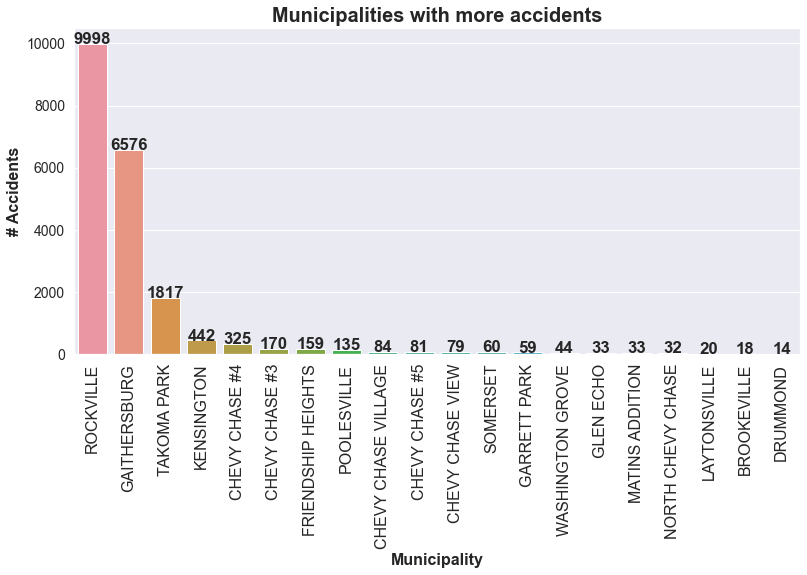

In [256]:
# Plot helper functions
def value_barplot_label(plot_name):
    # Inserts the value label on the top of each bar.

    for p in plot_name.patches:
        height = p.get_height()
        plot_name.text(p.get_x()+p.get_width()/2., height,'{:0.0f}'.format(height), ha="center").set_weight('bold')

def tick_format(plot,tick_type):
    if tick_type == 1:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
            label.set_rotation(90) 
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
    
    if tick_type == 2:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
    
    if tick_type == 3:
        for label in plot.get_xticklabels():
            label.set_fontsize(16)
        for label in plot.get_yticklabels():
            label.set_fontsize(14)
            label.set_rotation(20)        
        
# Visualization
plt.figure(figsize=(13,6))
x = df['municipality'].value_counts().index
y = df['municipality'].value_counts()
ax = sns.barplot(x=x, y=y)
plt.title("Municipalities with more accidents", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Accidents', fontsize=16).set_weight('bold')
ax.set_xlabel('Municipality', fontsize=16).set_weight('bold')
tick_format(ax,1)

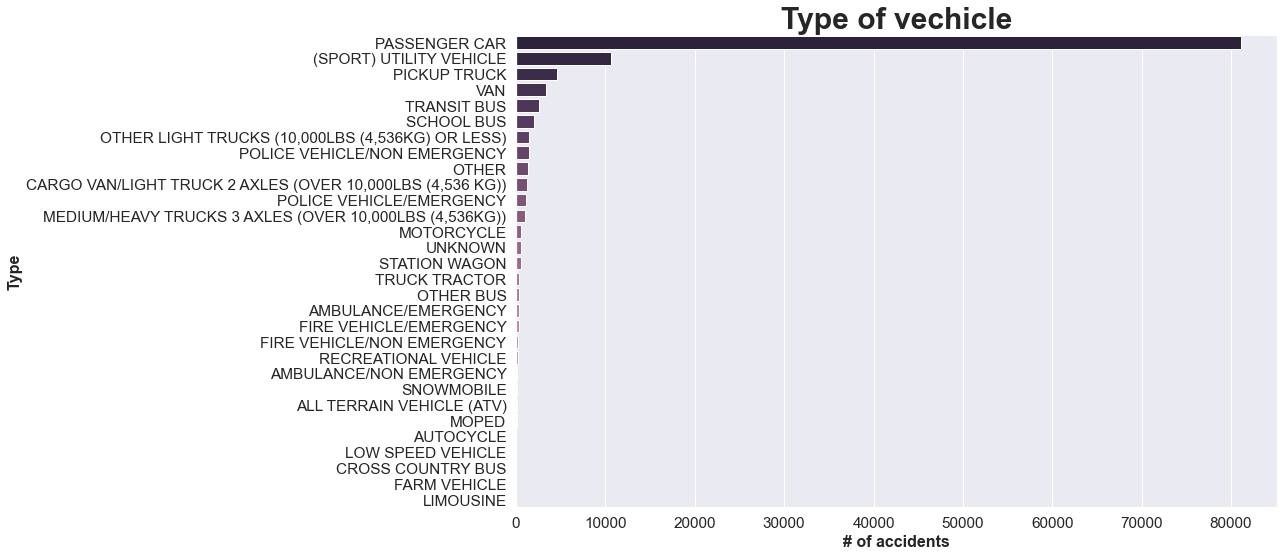

In [257]:
typeofvehicle = df['vehicle_body_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=typeofvehicle, 
                 y=typeofvehicle.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofvehicle.index)),
                 ax=ax1)
plt.title("Type of vechicle", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')


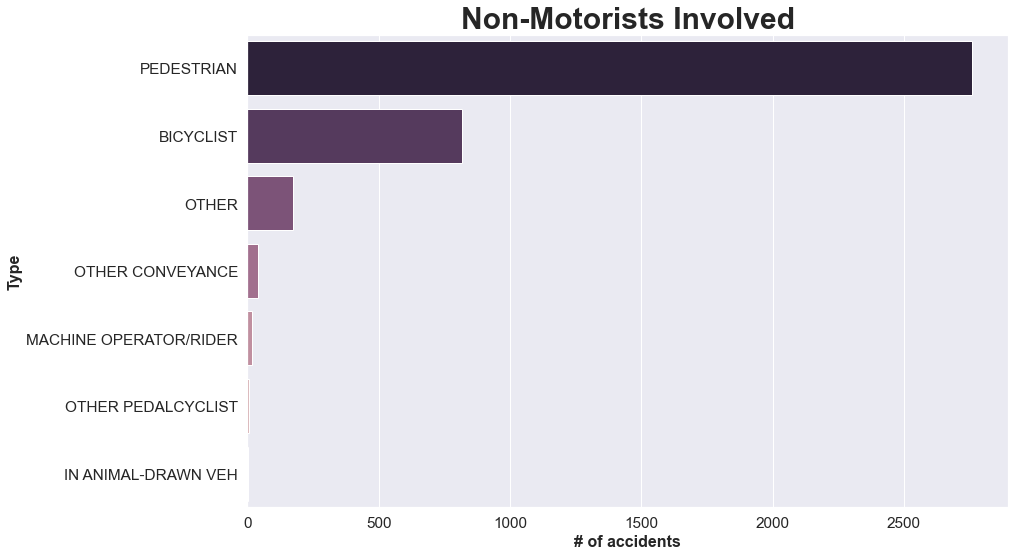

In [258]:
typeofpedestrian = df['pedestrian_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=typeofpedestrian, 
                 y=typeofpedestrian.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofpedestrian.index)),
                 ax=ax1)
plt.title("Non-Motorists Involved", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')

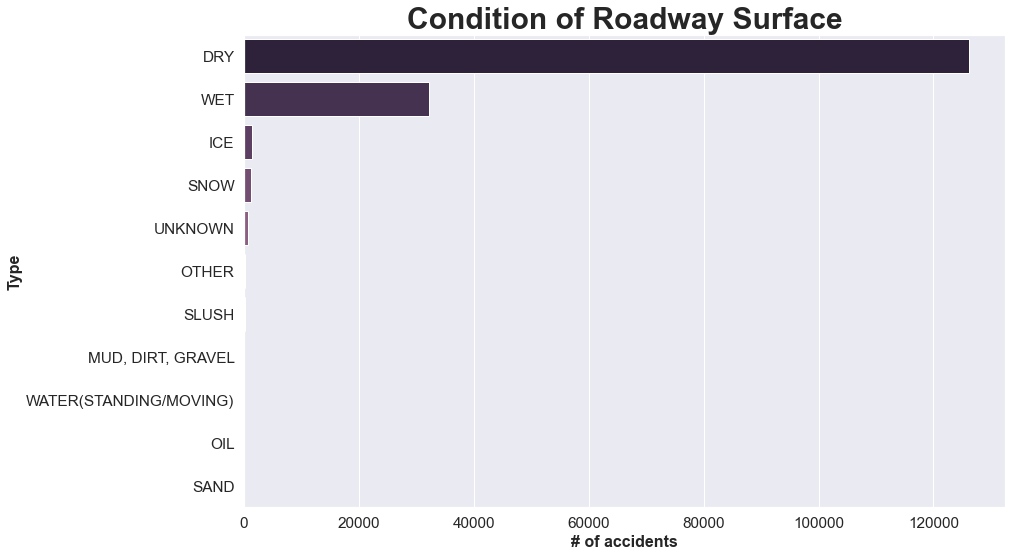

In [259]:

roadway_surface = df['surface_condition'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=roadway_surface, 
                 y=roadway_surface.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(roadway_surface.index)),
                 ax=ax1)
plt.title("Condition of Roadway Surface", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')

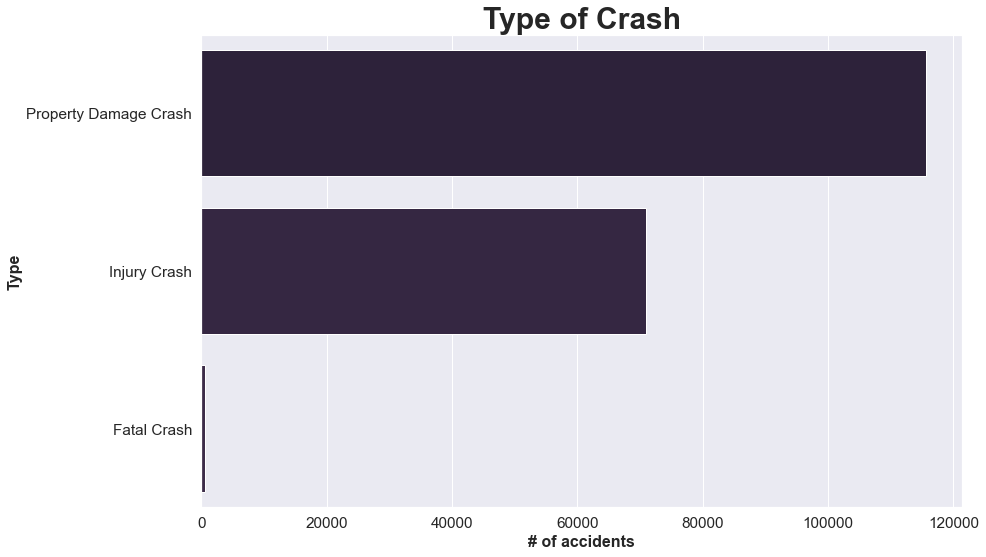

In [260]:
crashIdentificaton = df['acrs_report_type'].value_counts()
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(421)
ax1 = sns.barplot(x=crashIdentificaton, 
                 y=crashIdentificaton.index, 
                 palette=sns.cubehelix_palette(reverse=True, n_colors=len(typeofvehicle.index)),
                 ax=ax1)
plt.title("Type of Crash", fontsize=30).set_weight('bold')
ax1.set_ylabel('Type', fontsize=16).set_weight('bold')
ax1.set_xlabel('# of accidents', fontsize=16).set_weight('bold')

In [261]:
# Create new columns
#convert the column to datetime first using
import datetime as dt

df['DateTime'] = pd.to_datetime(df['crash_date_time'])
#df['Date'] = df['DateTime'].dt.strftime('%d/%m/%Y')
df['Day'] = df['DateTime'].dt.strftime('%d')
df['Month'] = df['DateTime'].dt.strftime('%m')
df['Year'] = df['DateTime'].dt.strftime('%Y')
#df['Time'] = df['DateTime'].dt.strftime('%H:%M')
df['Hour'] = df['DateTime'].dt.strftime('%H')
df['Dayofweek'] = df['DateTime'].dt.day_name()


print(df)


     report_number local_case_number               agency_name  \
0      MCP9365000Y         180008970  Montgomery County Police   
1      MCP2651001R         170540696  Montgomery County Police   
2      MCP2970000J          15032933                MONTGOMERY   
3      MCP2473000Y         170511071  Montgomery County Police   
4      MCP2298009K          16046061  Montgomery County Police   
...            ...               ...                       ...   
3810   MCP2290000J          17012018  Montgomery County Police   
3811   MCP13050010          16045730  Montgomery County Police   
3812   MCP1220006C         180005659  Montgomery County Police   
3813   MCP28820023         170525535  Montgomery County Police   
3814   MCP2930001G         190016985  Montgomery County Police   

           acrs_report_type         crash_date_time hit_run        route_type  \
0     Property Damage Crash  02/21/2018 09:42:00 AM      No        US (State)   
1              Injury Crash  11/03/2017 02:40

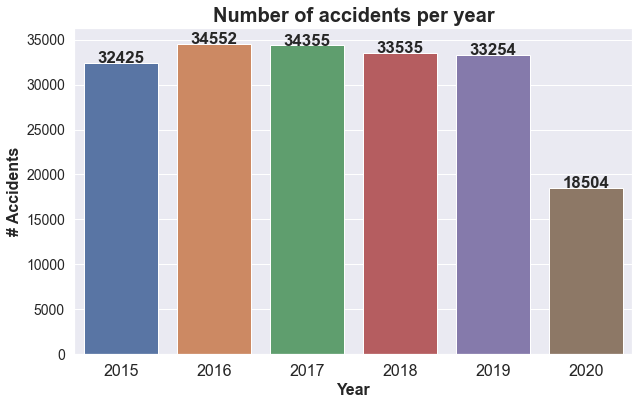

In [262]:
# Visualize Number of Incidents per year
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df['Year'].value_counts().index, y=concat2['Year'].value_counts())
plt.title("Number of accidents per year", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Accidents', fontsize=16).set_weight('bold')
ax.set_xlabel('Year', fontsize=16).set_weight('bold')
tick_format(ax,2)

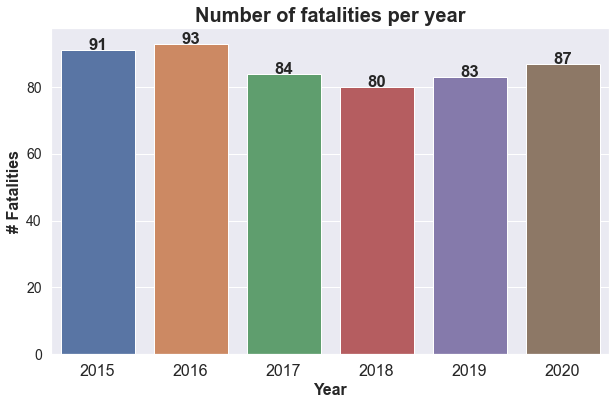

In [263]:
# Visualize Number of Incidents per year
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Fatal Crash'].tolist())
plt.title("Number of fatalities per year", fontsize=20).set_weight('bold')
value_barplot_label(ax)
ax.set_ylabel('# Fatalities', fontsize=16).set_weight('bold')
ax.set_xlabel('Year', fontsize=16).set_weight('bold')
tick_format(ax,2)

Text(0.5, 1.0, 'Accidents per day of week per hour')

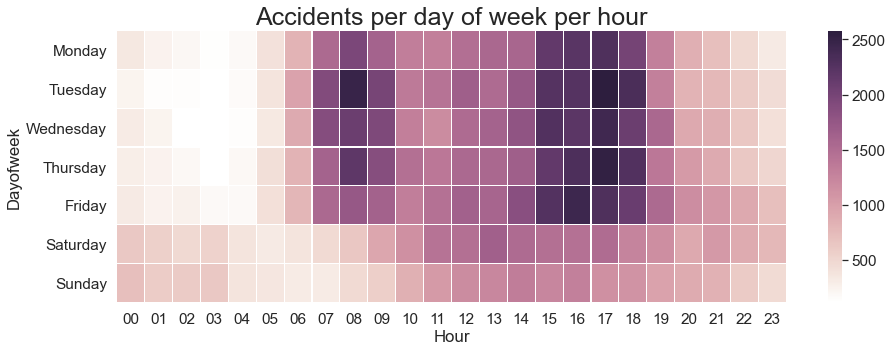

In [264]:
sns.set(font_scale=1.4)
heat_data=df.groupby(['Dayofweek', 'Hour'])['Year'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
heat_data = heat_data.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                        'Friday', 'Saturday', 'Sunday'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,5))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Accidents per day of week per hour', fontsize=25)

Text(0.5, 1.0, 'Accidents per month of year per hour')

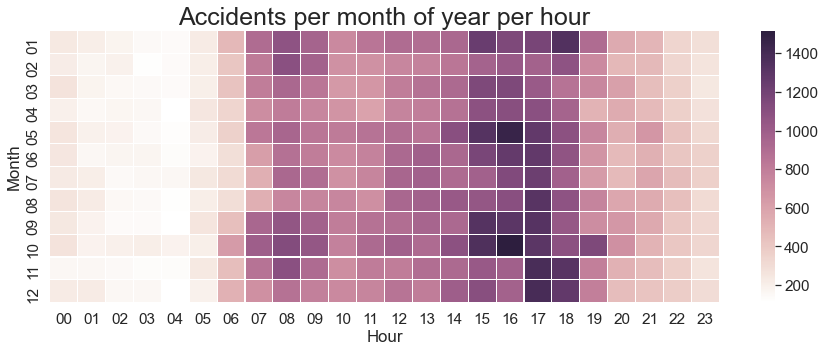

In [265]:
sns.set(font_scale=1.4)
heat_data=df.groupby(['Month', 'Hour'])['Year'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,5))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Accidents per month of year per hour', fontsize=25)

## Crash

**acrs_report_type:** Identifies crash as property, injury, or fatal. Possible values are 'Property Damage Crash', 'Injury Crash', 'Fatal Crash'.<br>
**report_number:** ACRS Report Number assigned to the incident.<br>
**crash_date_time:** Date and Time of crash.<br>
**municipality:** Jurisdiction for crash location.<br>
**collision_type:** Type of collision.<br>
**latitude:** Y coordinate of crash location.<br>
**longitude:** X coordinate of crash location.<br>

In [266]:
start_year = df.Year.min()
end_year = df.Year.max()

# A count of the number of fatal casualties associated with crashes.
fatal = (df['acrs_report_type'].values == 'Fatal Crash').sum()

injury = (df['acrs_report_type'].values == 'Injury Crash').sum()

propertyDamage = (df['acrs_report_type'].values == 'Property Damage Crash').sum()

print("The total death in car crash accidents since the year {}, up to {} is {}.".format(start_year, end_year,fatal))
print("While the total number of injuries and properties damage in car accidents reach {}, {} respectively".format(injury,propertyDamage))

The total death in car crash accidents since the year 2015, up to 2020 is 518.
While the total number of injuries and properties damage in car accidents reach 70925, 115644 respectively


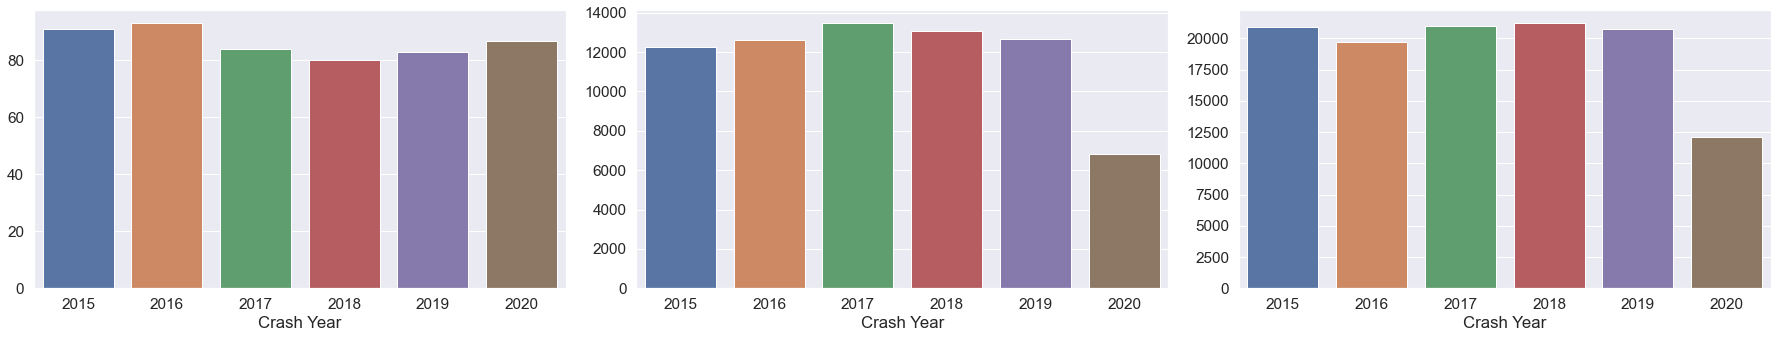

In [267]:
fig, ax = plt.subplots(1, 3, figsize = (25, 5));

                              
sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Fatal Crash'].tolist(), ax=ax[0]);
sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Injury Crash'].tolist(), ax=ax[1]);
sns.barplot(x=df['Year'].value_counts().index, y=df.groupby(['Year']).acrs_report_type.value_counts().loc[:,'Property Damage Crash'].tolist(), ax=ax[2]);
[ax[i].set_xlabel('Crash Year') for i in range(3)]
plt.tight_layout()

## Roads

**route_type:** Type of roadway at crash location.<br>
**mile_point:** Location - Mile point.<br>
**mile_point_direction:** Location - Mile point direction.<br>
**lane_direction:** Road/Area - Lane direction of travel.<br>
**lane_number:** Road/Area - Lane number of where the event occurred on.<br>
**lane_type:** Road/Area - Type of roadway/area lane.<br>
**number_of_lanes:** Road/Area - Number of lanes.<br>
**direction:** Location - Direction from mile point.<br>
**distance:** Location - Distance from mile point.<br>
**distance_unit:** Location - Unit of measurement for mile point distance.<br>
**road_grade:** Road/Area - Roadway grade.<br>
**nontraffic:** Location - Recorded as a Non-Traffic event.<br>
**road_name:** Name of road.<br>
**cross_street_type:** Roadway type for nearest cross-street.<br>
**cross_street_name:** Name of nearest cross-street.<br>
**off_road_description:** Description of location for off-road collisions.<br>
**surface_condition:** Condition of roadway surface.<br>
**light:** Lighting conditions.<br>
**junction:** The type of junction where the collision occurred.<br>
**intersection_type:** If the collision was intersection related, this field describes the intersection characteristics.<br>
**intersection_area:** Road/Area-Describes the interchange type, such as it being a thru roadway, ramp, or other related area types.<br>
**road_alignment:** The road alignment where the collision occurred.<br>
**road_condition:** The condition of the road when the collision occurred.<br>
**road_division:** The road division where the collision occurred.<br>


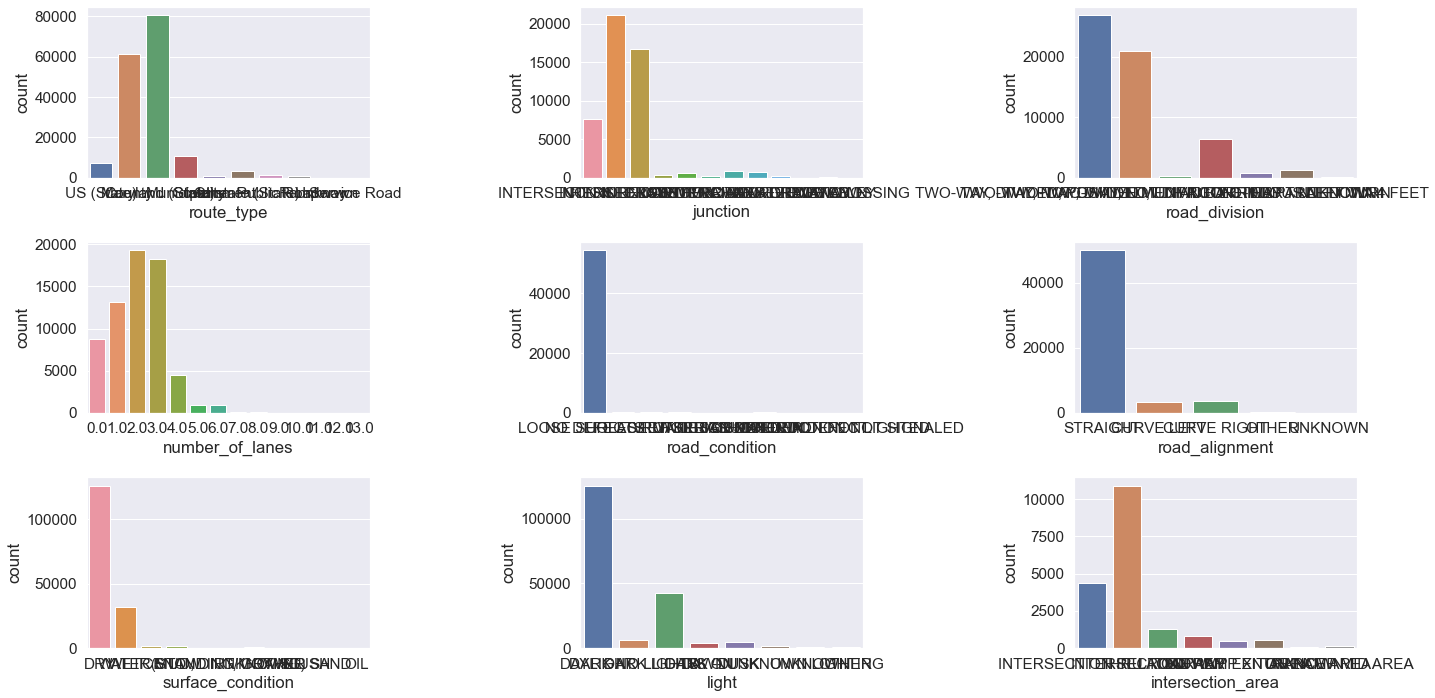

In [268]:
fig, ax = plt.subplots(3, 3, figsize = (20, 10));

sns.countplot(x='route_type',data=df, ax=ax[0,0])
sns.countplot(x="junction",data=df,  ax=ax[0,1])
sns.countplot(x='road_division',data=df, ax=ax[0,2])
sns.countplot(x='number_of_lanes',data=df, ax=ax[1,0])
sns.countplot(x='road_condition',data=df, ax=ax[1,1])
sns.countplot(x='road_alignment',data=df,  ax=ax[1,2])
sns.countplot(x='surface_condition',data=df, ax=ax[2,0])
sns.countplot(x='light',data=df, ax=ax[2,1])
sns.countplot(x='intersection_area',data=df, ax=ax[2,2])

plt.tight_layout()

## Trafic

**speed_limit:** Vehicle Circumstances - Local area posted speed limit.

## Weather

# Machine Learning Model to Predict Car Crash Fatality

We can approach the modeling part of this problem in different ways. We will approach it as a regression problem. We will take it as **Multinomial Logistic Regression** problem and predict the outcome of a crash as fataly , Injury or Property Damage based on the attributes of the crash dataset.  The discussion below is focused on fitting multinomial logistic regression models with **sklearn and statsmodels**. We need to classify the dependent variable that has three classes.  For this purpose, the binary logistic regression model offers multinomial extensions.  Multinomial logistic regression analysis has lots of aliases:  polytomous LR, multiclass LR, softmax regression, multinomial logit, and others. 

## Multinominal Logistic Regression Assumptions
* Multinominal logistic regression requires the dependent variable should be measured at the nominal level.<br>
    Nominal variable include **acrs_report_type** with three categories: Fatal Crash, Injury Crash and Property Damage Crash.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* There needs to be a linear relationship between any continuous independent variables and the logit transformation of the dependent variable.
* It requires quite large sample sizes.


## Feature Selection Methods
**Feature selection methods** are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.<br>
**Filter Method:** Select subsets of features based on their relationship with the target.
* Statistical Methods
* Feature Importance Methods

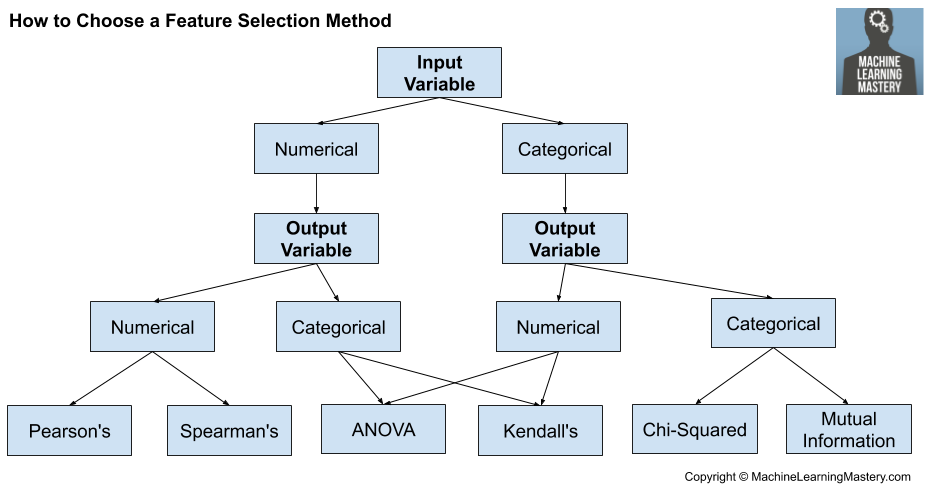

### Chi-Square Test for Feature Selection
Before performig Ch-Square test we have to make sure data is label encoded.

### USING SCI-KIT LEARN
I use Sci-Kit Learn for fitting multinomial logistic regression models. I classify the crash outcome instead in three categories : 

* Category 1: Fatal (n= 518)

* Category 2: Injury  (n=70925)

* Category 3: Property Damage (n=115644)

In [286]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
import matplotlib.pyplot as plt

## Handling categorical data with sklearn

Encoders are parts of the SciKit Learn library in Python, and they are used to convert categorical data, or text data, into numbers, which our predictive models can better understand

Once loaded, we can split the columns into input (X) and output for modeling

In [279]:
# get a list of columns
cols = list(df)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('acrs_report_type')))
cols


['acrs_report_type',
 'report_number',
 'local_case_number',
 'agency_name',
 'crash_date_time',
 'hit_run',
 'route_type',
 'mile_point',
 'mile_point_direction',
 'lane_direction',
 'lane_number',
 'lane_type',
 'number_of_lanes',
 'direction',
 'distance',
 'distance_unit',
 'road_grade',
 'nontraffic',
 'road_name',
 'cross_street_type',
 'cross_street_name',
 'off_road_description',
 'municipality',
 'related_non_motorist',
 'at_fault',
 'collision_type',
 'weather',
 'surface_condition',
 'light',
 'traffic_control',
 'driver_substance_abuse',
 'non_motorist_substance_abuse',
 'first_harmful_event',
 'second_harmful_event',
 'fixed_oject_struck',
 'junction',
 'intersection_type',
 'intersection_area',
 'road_alignment',
 'road_condition',
 'road_division',
 'latitude',
 'longitude',
 'location',
 'person_id',
 'driver_at_fault',
 'injury_severity',
 'circumstance',
 'driver_distracted_by',
 'drivers_license_state',
 'vehicle_id',
 'vehicle_damage_extent',
 'vehicle_first_impact_

Split into input (X) and output (y) variables

In [284]:
# retrieve numpy array
dataset = df.values

X = dataset[:, 1:]
y = dataset[:,0]